# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Upload & view dataset

In [3]:
df = pd.read_csv('wine_data.csv')
#df
df.head()

,class_label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Splitting dataset

### Since we are performing only normalization we are not doing any EDA analysis here. Just we are going to perform Normalization to see the difference in the distribution of dataset.

In [7]:
X = df.drop('class_label', axis=1)
y = df['class_label']
print(X.shape)
print(y.shape)

(178, 13)
(178,)


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Normalization
### Here we are choosing Min Max scaler for normalization on our features that is X

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # the minmax function is used here and it is stored in scaler data type
X_train_norm = scaler.fit_transform(X_train) # feature training is normalized using fit_transform 
X_test_norm = scaler.fit_transform(X_test) # feature testing is normalized using fit_transform 
# We cannot print the X_test_norm directly because they contain 2D array and hence those doen not have column name 
#so to get the values with appropriate column name we need to convery numpy array to dataframe so the next 2 lines does that
X_train_norm_df = pd.DataFrame(X_train_norm, columns=X.columns) 
X_test_norm_df = pd.DataFrame(X_test_norm, columns=X.columns)

In [17]:
# Values before normalization
print(X_train.head())

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
158    14.34        1.68  2.70               25.0         98           2.80   
137    12.53        5.51  2.64               25.0         96           1.79   
98     12.37        1.07  2.10               18.5         88           3.52   
159    13.48        1.67  2.64               22.5         89           2.60   
38     13.07        1.50  2.10               15.5         98           2.40   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
158        1.31                  0.53             2.70            13.00  0.57   
137        0.60                  0.63             1.10             5.00  0.82   
98         3.75                  0.24             1.95             4.50  1.04   
159        1.10                  0.52             2.29            11.75  0.57   
38         2.64                  0.28             1.37             3.70  1.18   

     OD280/OD315_of_diluted_wines  pro

In [19]:
# values after normalization 
print(X_train_norm_df.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.871053    0.160896  0.716578           0.742268   0.304348   
1  0.394737    0.940937  0.684492           0.742268   0.282609   
2  0.352632    0.036660  0.395722           0.407216   0.195652   
3  0.644737    0.158859  0.684492           0.613402   0.206522   
4  0.536842    0.124236  0.395722           0.252577   0.304348   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.627586    0.204641              0.754717         0.721519   
1       0.279310    0.054852              0.943396         0.215190   
2       0.875862    0.719409              0.207547         0.484177   
3       0.558621    0.160338              0.735849         0.591772   
4       0.489655    0.485232              0.283019         0.300633   

   color_intensity       hue  OD280/OD315_of_diluted_wines   proline  
0         1.000000  0.073171                      0.252747  0.301024  
1         0.289520  0.276423

### In above values we can clearly see the values of the training features has shown difference before and after normalization. Before normalization the values were random with different numbers. But after normalization it ranges between 0 and 1

# Graph Plotting

### For Alcohol

Text(0.5, 1.0, 'Before Normalization: alcohol')

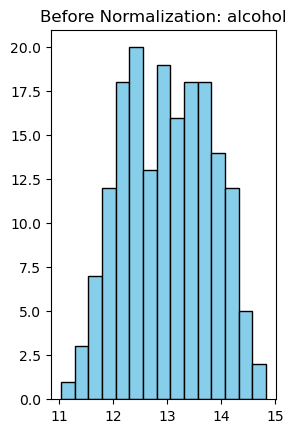

In [20]:
# Before Normalization - Alcohol
plt.subplot(1,2,1)
plt.hist(X['alcohol'], bins=15, color='skyblue', edgecolor='black')
plt.title('Before Normalization: alcohol')

Text(0.5, 1.0, 'After Normalization: alcohol')

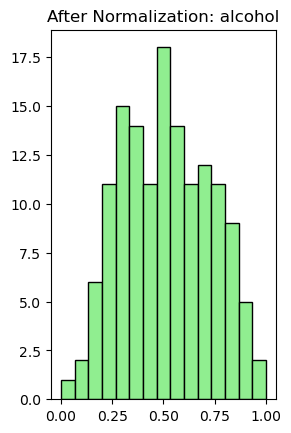

In [23]:
# After Normalization - Alcohol
plt.subplot(1,2,2)
plt.hist(X_train_norm_df['alcohol'], bins=15, color='lightgreen', edgecolor='black')
plt.title('After Normalization: alcohol')

# Graph Plotting

### For Malic acid

Text(0.5, 1.0, 'Before Normalization: Malic acid')

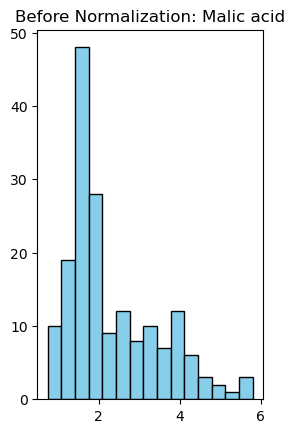

In [22]:
# Before Normalization - Malic acid
plt.subplot(1,2,1)
plt.hist(X['malic_acid'], bins=15, color='skyblue', edgecolor='black')
plt.title('Before Normalization: Malic acid')

Text(0.5, 1.0, 'After Normalization: Malic acid')

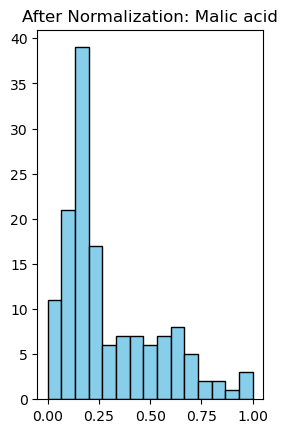

In [24]:
# After Normalization - Malic acid
plt.subplot(1,2,2)
plt.hist(X_train_norm_df['malic_acid'], bins=15, color='skyblue', edgecolor='black')
plt.title('After Normalization: Malic acid')